In [4]:
%load_ext autoreload
%autoreload 2
    
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from Openseas_Methods import *
from pycoingecko import CoinGeckoAPI
from datetime import datetime,timedelta
import numpy as np
from scipy.stats import pearsonr
import pickle
import decision_tree as tree
from itertools import islice
from decision_tree import get_eth_price
from pymongo import MongoClient

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
client = MongoClient()
db = client.NFTDB
collection_data = db.salesCollection
stats_collection = db.NFTStats
slug_collection = db.completedSlugs
combos = db.NFT
skip_list=['ens','base-introduced','fundrop-pass','gemesis','apecoin','dai-stablecoin','uniswap','1inch-token']

In [7]:
with open('combo_per.pkl','rb') as f:
    combo_perc = pickle.load(f)
G = make_nft_graph(list(combo_perc.items()),skip_list=skip_list)
comms = nx.community.greedy_modularity_communities(G,weight='weight')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2411.21it/s]


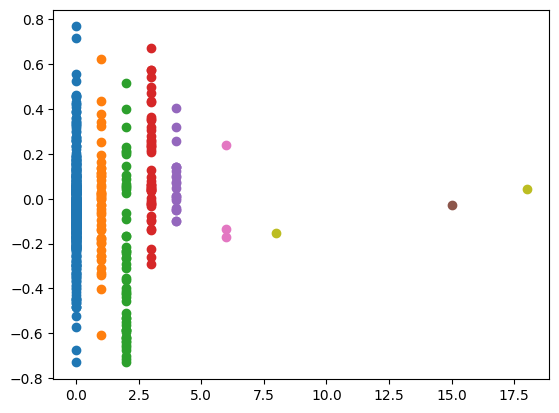

In [18]:

for i,comm in enumerate(comms[:30]):
    x = []
    y = []
    for slug in tqdm(comm):
        sale_data = list(collection_data.find({'slug':slug,'timestamp':{'$regex':'2023'}}))
        # print(slug,len(milady_data))
        if len(sale_data)<10:
            continue
        sale_prices = [x['total_price']*get_eth_price(x['timestamp']) for x in sale_data if x['timestamp']]
        eth_prices = [get_eth_price(x['timestamp']) for x in sale_data if x['timestamp']]
        p = eth_prices
        q = sale_prices
            
        corr = pearsonr(p,q)
        x.append(i)
        y.append(corr.statistic)
    # plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.scatter(x,y)
plt.show()